# Attacking Midfielder Attribute Analysis

In [11]:
#Gonna have to do attribute analysis first, then I can do statistical analysis later. 
#loading the data into the spreadsheet
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
import pandas as pd

# Replace 'file_path' with the actual file path of your CSV file
am_file_path = '/Users/JumpMan/Desktop/FM_Analytics_Project_Feb_2024/FM24_Player_Database/Arsenal_FM24_Save/Attributes/csv/Advanced_Midfielder_Attributes.csv'

# Load the CSV file into a DataFrame
am_df = pd.read_csv(am_file_path)

# Display the first few rows of the DataFrame
am_df.head()


,UID,Name,Club,Position,Age,New Transfer Value,Salary,Anticipation,Vision,Off The Ball,Teamwork,Decisions,Composure,Technique,Passing,Flair,Dribbling,Agility,First Touch
0,28108494.0,Phil Foden - English,Man City - English Premier Division,"M (C), AM (RLC)",24.0,"£255,000,000.00","£205,000.00",15.0,16.0,16.0,14.0,14.0,15.0,17.0,17.0,16.0,17.0,17.0,17.0
1,29233143.0,Harvey Elliott - English,Liverpool - English Premier Division,"M (C), AM (R)",21.0,"£239,500,000.00","£45,000.00",14.0,16.0,15.0,17.0,14.0,15.0,16.0,16.0,15.0,14.0,15.0,17.0
2,29232937.0,Jude Bellingham - English,R. Madrid - Spanish First Division,"DM, M/AM (C)",20.0,"£227,500,000.00","£350,000.00",16.0,17.0,17.0,16.0,14.0,17.0,17.0,16.0,16.0,17.0,16.0,16.0
3,67197125.0,Marco Asensio - Spanish,Paris SG - Ligue 1 Uber Eats,AM (RLC),28.0,"£212,500,000.00","£115,000.00",15.0,16.0,13.0,14.0,14.0,14.0,17.0,16.0,17.0,16.0,15.0,17.0
4,19302146.0,Vinícius Júnior - Brazilian,R. Madrid - Spanish First Division,"M (L), AM (RL)",23.0,"£219,000,000.00","£350,000.00",16.0,14.0,17.0,13.0,16.0,15.0,15.0,15.0,16.0,19.0,16.0,14.0


In [14]:
print(am_df.columns)

Index(['UID', 'Name', 'Club', 'Position', 'Age', 'New Transfer Value ',
       'Salary', 'Anticipation', 'Vision', 'Off The Ball', 'Teamwork',
       'Decisions', 'Composure', 'Technique', 'Passing', 'Flair', 'Dribbling',
       'Agility', 'First Touch'],
      dtype='object')


In [15]:
#Calculator
#Calculator Stuff
am_df['am_key']= ((
    am_df['First Touch'] + 
    am_df['Passing'] + 
    am_df['Technique'] + 
    am_df['Composure'] + 
    am_df['Decisions'] + 
    am_df['Off The Ball'] + 
    am_df['Vision'] + 
    am_df['Teamwork'] +
    am_df['Vision'] 
) * 5)



am_df['am_important'] = ((
    am_df['Dribbling'] + 
    am_df['Anticipation'] + 
    am_df['Flair'] + 
    am_df['Agility']
) * 4)





am_df['am_score'] = ((am_df['am_key'] + am_df['am_important']) / 61)
am_df['am_score'] = am_df['am_score'].round(1)


/var/folders/bf/4lyx7mbx6_x3y4pb5d93fm7h0000gp/T/ipykernel_57304/1422049279.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


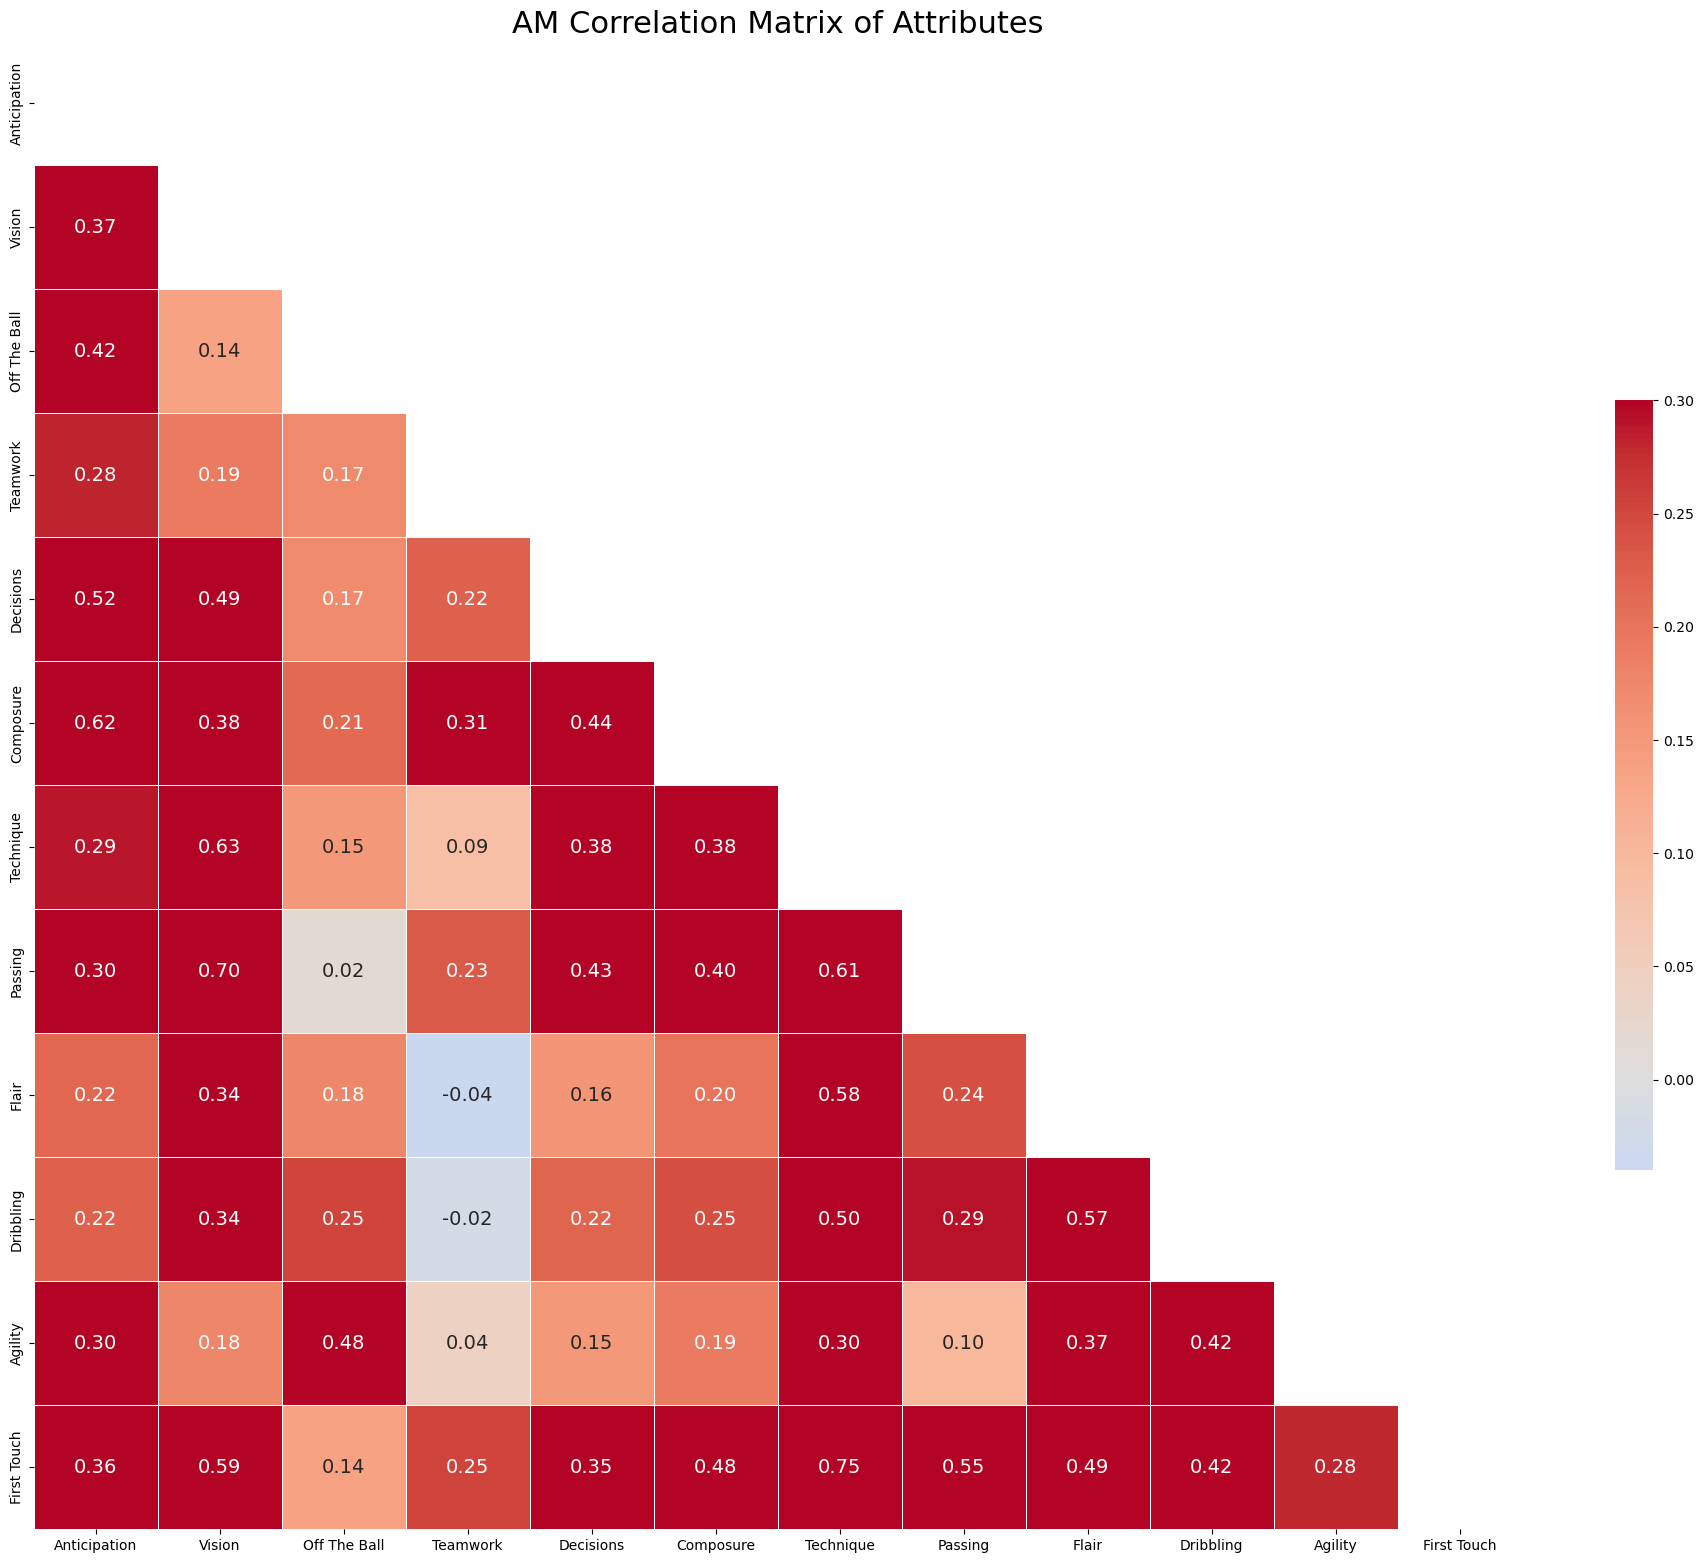

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select the columns of interest
attributes = [ 'Anticipation', 'Vision', 'Off The Ball', 'Teamwork',
       'Decisions', 'Composure', 'Technique', 'Passing', 'Flair', 'Dribbling',
       'Agility', 'First Touch']

# Compute the correlation matrix
correlation_matrix = am_df[attributes].corr()

# Set up the matplotlib figure
plt.figure(figsize=(24, 20))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generate a custom sequential colormap with varying shades of blue
cmap = plt.cm.get_cmap('coolwarm')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f", annot_kws={"fontsize":14})

plt.title('AM Correlation Matrix of Attributes', fontsize=22)  # Increase title font size
plt.show()


In [22]:
# Selecting the desired columns from the original DataFrame
selected_columns = ['UID', 'Name', 'Club', 'Age' ,'Position', 'New Transfer Value ', 'Salary', 'Age', 
                    'am_key', 'am_important', 'am_score']

# Creating a new DataFrame with the selected columns from ball_playing_defender_df
new_am_df = am_df[selected_columns]

# Displaying the new DataFrame
new_am_df.head(41)

,UID,Name,Club,Age,Position,New Transfer Value,Salary,Age,am_key,am_important,am_score
0,2.810849e+07,Phil Foden - English,Man City - English Premier Division,24.0,"M (C), AM (RLC)","£255,000,000.00","£205,000.00",24.0,710.0,260.0,15.9
1,2.923314e+07,Harvey Elliott - English,Liverpool - English Premier Division,21.0,"M (C), AM (R)","£239,500,000.00","£45,000.00",21.0,710.0,232.0,15.4
2,2.923294e+07,Jude Bellingham - English,R. Madrid - Spanish First Division,20.0,"DM, M/AM (C)","£227,500,000.00","£350,000.00",20.0,735.0,260.0,16.3
3,6.719712e+07,Marco Asensio - Spanish,Paris SG - Ligue 1 Uber Eats,28.0,AM (RLC),"£212,500,000.00","£115,000.00",28.0,685.0,252.0,15.4
4,1.930215e+07,Vinícius Júnior - Brazilian,R. Madrid - Spanish First Division,23.0,"M (L), AM (RL)","£219,000,000.00","£350,000.00",23.0,665.0,268.0,15.3
5,1.800446e+07,Kevin De Bruyne - Belgian,Man City - English Premier Division,32.0,"M (RLC), AM (C)","£194,000,000.00","£350,000.00",32.0,765.0,236.0,16.4
6,8.317476e+07,Vitinha - Portuguese,Paris SG - Ligue 1 Uber Eats,24.0,"DM, M (C)","£194,000,000.00","£170,000.00",24.0,700.0,240.0,15.4
7,3.704774e+07,Frenkie de Jong - Dutch,Barcelona - Spanish First Division,27.0,"DM, M (C)","£171,000,000.00","£275,000.00",27.0,755.0,256.0,16.6
8,6.729350e+07,Pedri - Spanish,Barcelona - Spanish First Division,21.0,"M (C), AM (RLC)","£166,000,000.00","£185,000.00",21.0,755.0,272.0,16.8
9,2.812458e+07,Jamal Musiala - German,FC Bayern - Bundesliga,21.0,"M (C), AM (RLC)","£159,500,000.00","£180,000.00",21.0,710.0,280.0,16.2


In [34]:
import pandas as pd

# Creating a new DataFrame with the selected columns from dlp_df
new_am_df = am_df[selected_columns]

# Sort the DataFrame based on 'dlp_score' in descending order
new_am_df = new_am_df.sort_values(by='am_score', ascending=False)

# Create an empty string to store the HTML content
html_content = "<h1>AM Attritube Analysis</h1>"
html_content += "<table border='1'><tr><th>Name</th><th>Club</th><th>Age</th><th>Position</th><th>Transfer Value</th><th>Salary</th><th>Am Score</th></tr>"

# Iterate over each row in the DataFrame
for index, player in new_am_df.iterrows():
    # Add a new row to the HTML table
    html_content += f"<tr><td>{player['Name']}</td><td>{player['Club']}</td><td>{player['Age']}</td><td>{player['Position']}</td><td>{player['New Transfer Value ']}</td><td>{player['Salary']}</td><td>{player['am_score']}</td></tr>"

# Close the HTML table tag
html_content += "</table>"

# Save the HTML content to a file
with open("AM Attribute Analysis 1st report.html", "w") as file:
    file.write(html_content)

print("HTML report generated successfully.")


HTML report generated successfully.


In [35]:
import pandas as pd

# Assuming you already have the DataFrame 'dlp_df' containing the data

# Group the DataFrame by 'Age' and find the player with the highest 'dlp_score' in each age group
best_am_by_age = am_df.groupby('Age').apply(lambda x: x.loc[x['am_score'].idxmax()])

# Select the desired columns for the report
report_columns = ['Name', 'Club', 'Age', 'Position', 'Transfer Value', 'Salary', 'am_score']

# Create an HTML report
html_content = "<h1>Best AM by Age </h1>"
html_content += "<table border='1'><tr><th>Name</th><th>Club</th><th>Age</th><th>Position</th><th>Transfer Value</th><th>Salary</th><th>AM Score</th></tr>"

# Iterate over each row in the grouped DataFrame
for index, player in best_am_by_age.iterrows():
    # Add a new row to the HTML table
    html_content += f"<tr><td>{player['Name']}</td><td>{player['Club']}</td><td>{player['Age']}</td><td>{player['Position']}</td><td>{player['New Transfer Value ']}</td><td>{player['Salary']}</td><td>{player['am_score']}</td></tr>"

# Close the HTML table tag
html_content += "</table>"

# Save the HTML content to a file
with open("best_am_by_age_report.html", "w") as file:
    file.write(html_content)

print("HTML report generated successfully.")


HTML report generated successfully.


In [39]:
import pandas as pd

# Assuming you already have the DataFrame 'am_df' containing the data

# Filter the DataFrame to include only players who are under 23 years old
u23_players = am_df[am_df['Age'] < 23]

# Sort the DataFrame by 'am_score' in descending order to rank the players
u23_players_ranked = u23_players.sort_values(by='am_score', ascending=False)

# Select the desired columns for the report
report_columns = ['Name', 'Club', 'Age', 'Position', 'Transfer Value', 'Salary', 'am_score']

# Create an HTML report
html_content = "<h1>Best U23 Players</h1>"
html_content += "<table border='1'><tr><th>Name</th><th>Club</th><th>Age</th><th>Position</th><th>Transfer Value</th><th>Salary</th><th>AM Score</th></tr>"

# Iterate over each row in the DataFrame
for index, player in u23_players_ranked.iterrows():
    # Add a new row to the HTML table
    html_content += f"<tr><td>{player['Name']}</td><td>{player['Club']}</td><td>{player['Age']}</td><td>{player['Position']}</td><td>{player['New Transfer Value ']}</td><td>{player['Salary']}</td><td>{player['am_score']}</td></tr>"

# Close the HTML table tag
html_content += "</table>"

# Save the HTML content to a file
with open("best_u23_players_report.html", "w") as file:
    file.write(html_content)

print("HTML report generated successfully.")


HTML report generated successfully.
